In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import joblib
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
df = pd.read_csv("salary_data.csv")
df.head()


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [4]:
df.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [5]:
df.shape

(375, 6)

In [6]:
df.columns


Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary'],
      dtype='object')

In [7]:
df.dtypes


Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object

In [8]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64

In [9]:
df_cleaned = df.dropna()

In [10]:
df_cleaned.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [11]:
df_cleaned.duplicated().sum()

np.int64(49)

In [12]:
df_cleaned[df.duplicated()]


/var/folders/bd/m8wphbrn0dgbjf_jwlvd99700000gn/T/ipykernel_27119/1933774369.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_cleaned[df.duplicated()]


,Age,Gender,Education Level,Job Title,Years of Experience,Salary
195,28.0,Male,Bachelor's,Junior Business Analyst,2.0,40000.0
250,30.0,Female,Bachelor's,Junior Marketing Coordinator,2.0,40000.0
251,38.0,Male,Master's,Senior IT Consultant,9.0,110000.0
252,45.0,Female,PhD,Senior Product Designer,15.0,150000.0
253,28.0,Male,Bachelor's,Junior Business Development Associate,2.0,40000.0
254,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
255,44.0,Male,Bachelor's,Senior Software Engineer,14.0,130000.0
256,34.0,Female,Master's,Senior Financial Advisor,6.0,100000.0
257,35.0,Male,Bachelor's,Senior Project Coordinator,9.0,95000.0
258,50.0,Female,PhD,Director of Operations,22.0,180000.0


In [13]:
df_cleaned = df_cleaned.drop_duplicates()


In [14]:
df_cleaned.duplicated().sum()


np.int64(0)

In [15]:
df_cleaned[df_cleaned.isnull().all(axis=1)]


,Age,Gender,Education Level,Job Title,Years of Experience,Salary


In [16]:
df_cleaned = df_cleaned.dropna(how='all')


In [17]:
df_cleaned.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


### EDA

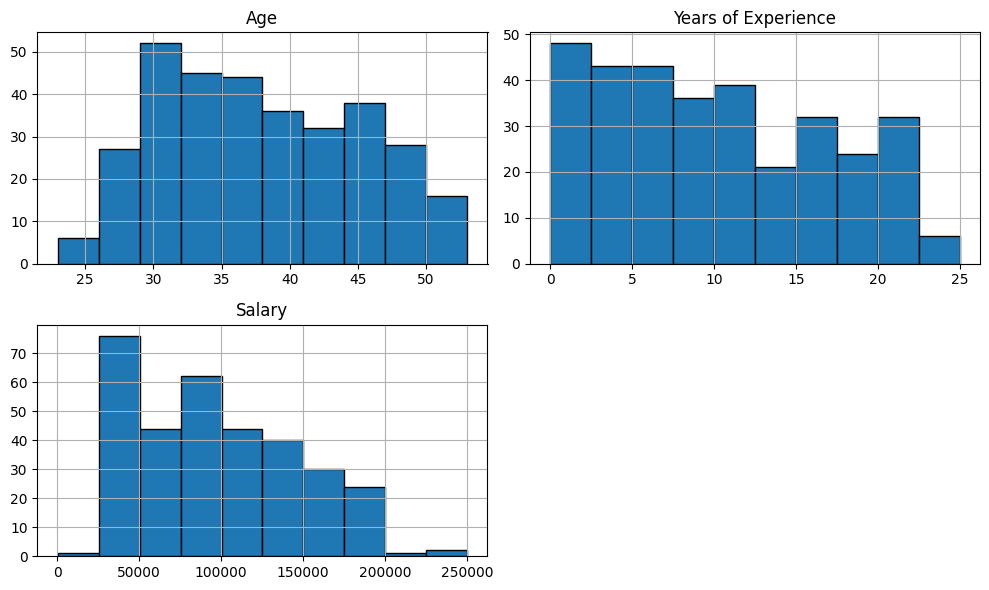

In [19]:
# Plot histograms of all numeric columns
hist_plot = df_cleaned.hist(figsize=(10, 6), edgecolor='black')
plt.tight_layout()
plt.show()

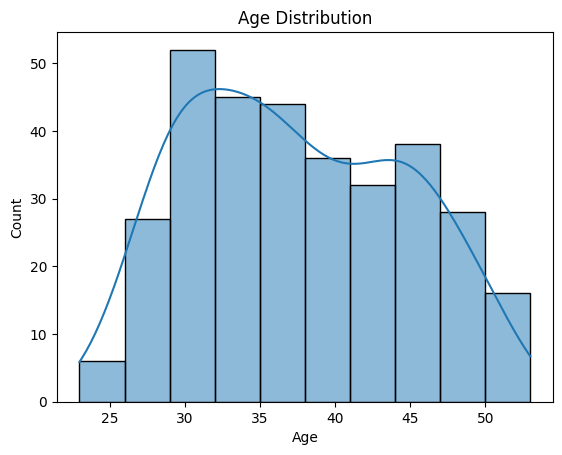

In [20]:

sns.histplot(data=df_cleaned, x="Age", bins=10, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

Age Distribution – Observations

The distribution of age is slightly right skewed, with a higher concentration of individuals between 28 and 40 years old.

The peak appears around 30–32 years, suggesting most employees are early career professionals.

No extreme outliers, but potential grouping or binning (e.g., age groups) could help simplify modeling.

Recommendation: Keep the age feature, possibly normalize or standardize it before modeling.

Salary Distribution

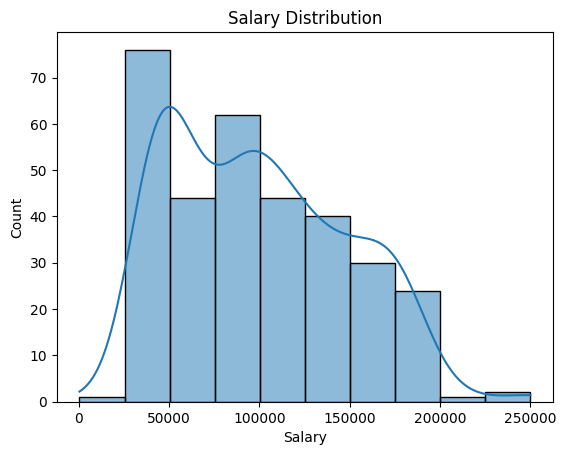

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data=df_cleaned, x="Salary", bins=10, kde=True)
plt.title("Salary Distribution")
plt.xlabel("Salary")
plt.ylabel("Count")
plt.show()


The salary distribution is right-skewed, meaning a majority of salaries are concentrated at the lower end (under $100,000).

A significant number of employees earn between $30,000 and $80,000, representing early to mid-career professionals.

The tail extends up to $250,000, indicating the presence of high-income outliers, possibly senior-level or specialized roles.

The KDE curve shows multi-modal peaks, which may suggest different job levels or departments within the dataset.

Such skewness can negatively impact linear regression, so applying a log transformation (e.g., np.log(Salary)) could improve model performance.

Consider investigating the outliers further — they might need to be clipped or treated separately depending on business needs.

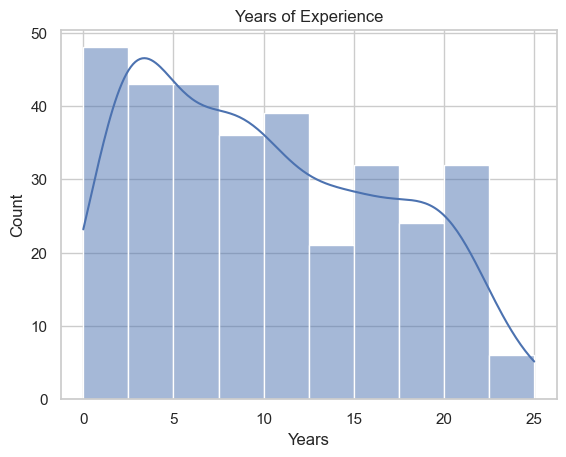

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data=df_cleaned, x="Years of Experience", bins=10, kde=True)
plt.title("Years of Experience")
plt.xlabel("Years")
plt.ylabel("Count")
plt.show()


Relationship between Experience and Salary

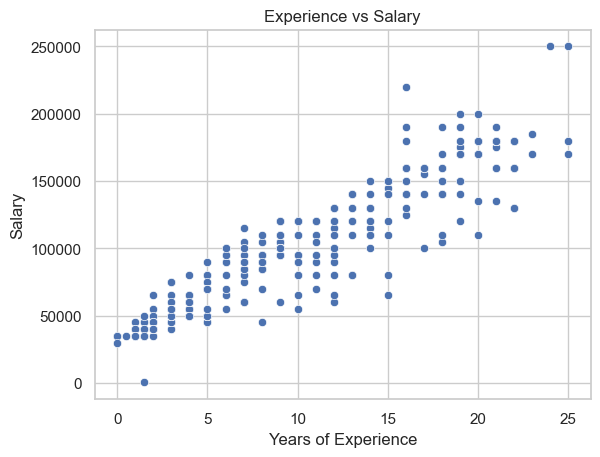

In [22]:
# Optional: Set a clean style
sns.set(style="whitegrid")

# Scatter plot
sns.scatterplot(data=df_cleaned, x="Years of Experience", y="Salary")
plt.title("Experience vs Salary")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.show()


Histogram of Experience

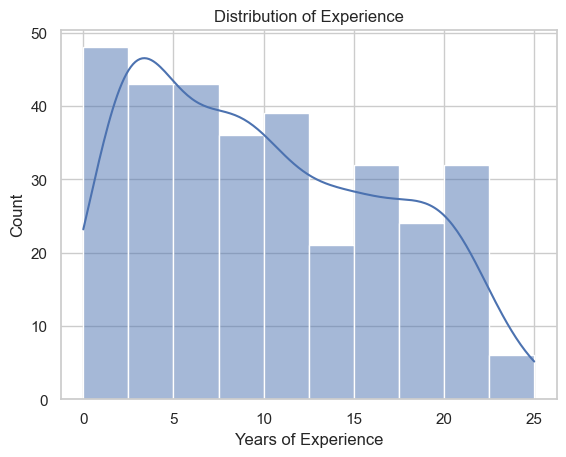

In [23]:
sns.histplot(df_cleaned["Years of Experience"], bins=10, kde=True)
plt.title("Distribution of Experience")
plt.xlabel("Years of Experience")
plt.show()


Boxplot – Detect outliers

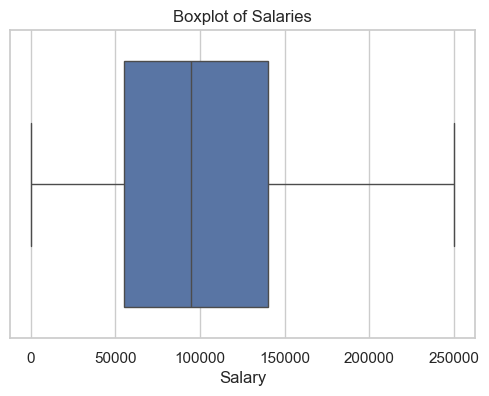

In [24]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_cleaned["Salary"])
plt.title("Boxplot of Salaries")
plt.show()


<Axes: >

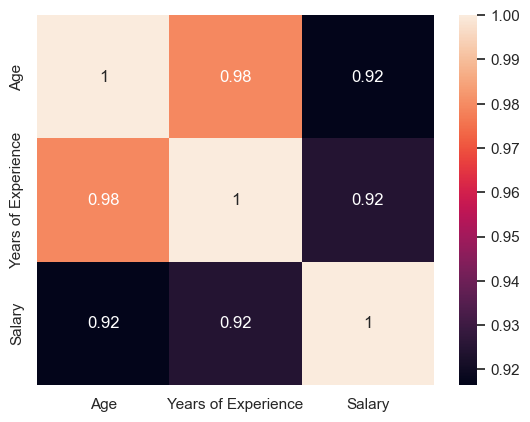

In [25]:
#Correlation heatmap
sns.heatmap(df_cleaned.corr(numeric_only=True), annot=True)


Modeling & Prediction

In [26]:
df_encoded = pd.get_dummies(
    df_cleaned,
    columns=['Gender', 'Education Level', 'Job Title'],
    drop_first=True
)


In [27]:
print(df_encoded.columns)


Index(['Age', 'Years of Experience', 'Salary', 'Gender_Male',
       'Education Level_Master's', 'Education Level_PhD',
       'Job Title_Accountant', 'Job Title_Administrative Assistant',
       'Job Title_Business Analyst', 'Job Title_Business Development Manager',
       ...
       'Job Title_Supply Chain Manager', 'Job Title_Technical Recruiter',
       'Job Title_Technical Support Specialist', 'Job Title_Technical Writer',
       'Job Title_Training Specialist', 'Job Title_UX Designer',
       'Job Title_UX Researcher', 'Job Title_VP of Finance',
       'Job Title_VP of Operations', 'Job Title_Web Developer'],
      dtype='object', length=179)


In [28]:
df_encoded.shape

(324, 179)

In [29]:
X = df_encoded.drop("Salary", axis=1)
y = df_encoded["Salary"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)
print("WITHOUT scaling:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))


WITHOUT scaling:
RMSE: 15851.15476886
R² Score: 0.8670436880629805


Model is off by about ±16K
So if the true salary is $75,000, the model might predict anywhere from:

$75,000 ± $16,822 → Between $58,178 and $91,822

Model B: Linear Regression WITH Scaling

In [30]:
from sklearn.preprocessing import StandardScaler

# Copy original feature set
X_scaled = df_encoded.drop("Salary", axis=1).copy()

# Scale only the numeric columns
scaler = StandardScaler()
X_scaled[['Age', 'Years of Experience']] = scaler.fit_transform(
    X_scaled[['Age', 'Years of Experience']]
)

# Train/test split
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Train the model
model_scaled = LinearRegression()
model_scaled.fit(X_train_s, y_train_s)

# Evaluate
y_pred_s = model_scaled.predict(X_test_s)
print("\nWITH scaling:")
print("RMSE:", np.sqrt(mean_squared_error(y_test_s, y_pred_s)))
print("R² Score:", r2_score(y_test_s, y_pred_s))



WITH scaling:
RMSE: 15851.1547688604
R² Score: 0.8670436880629737


In [31]:
from sklearn.linear_model import Ridge, Lasso


In [32]:
ridge_model = Ridge(alpha=1.0)  # alpha is the regularization strength
ridge_model.fit(X_train_s, y_train_s)

y_pred_ridge = ridge_model.predict(X_test_s)

print("\n Ridge Regression:")
print("RMSE:", np.sqrt(mean_squared_error(y_test_s, y_pred_ridge)))
print("R² Score:", ridge_model.score(X_test_s, y_test_s))



 Ridge Regression:
RMSE: 14061.141596013853
R² Score: 0.8953767250804621


In [33]:
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train_s, y_train_s)

y_pred_lasso = lasso_model.predict(X_test_s)

print("\n Lasso Regression:")
print("RMSE:", np.sqrt(mean_squared_error(y_test_s, y_pred_lasso)))
print("R² Score:", lasso_model.score(X_test_s, y_test_s))



 Lasso Regression:
RMSE: 14565.050651989643
R² Score: 0.8877435909508631


Random Forest Regressor

In [34]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=100, random_state=42)
forest.fit(X_train_s, y_train_s)
y_pred_forest = forest.predict(X_test_s)

print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test_s, y_pred_forest)))
print("R² Score:", forest.score(X_test_s, y_test_s))


Random Forest RMSE: 14934.150793274928
R² Score: 0.8819820106650813


Gradient Boosting Regressor

In [35]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train_s, y_train_s)
y_pred_gb = gb.predict(X_test_s)

print("Gradient Boosting RMSE:", np.sqrt(mean_squared_error(y_test_s, y_pred_gb)))
print("R² Score:", gb.score(X_test_s, y_test_s))


Gradient Boosting RMSE: 15067.143337015592
R² Score: 0.8798706888815266


XGBoost Regressor

In [40]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train_s, y_train_s)

y_pred_xgb = xgb_model.predict(X_test_s)

print("\n XGBoost Regressor")
print("RMSE:", np.sqrt(mean_squared_error(y_test_s, y_pred_xgb)))
print("R² Score:", r2_score(y_test_s, y_pred_xgb))



 XGBoost Regressor
RMSE: 15561.756532399804
R² Score: 0.8718541990983822


NN

In [37]:
from sklearn.neural_network import MLPRegressor

mlp_model = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp_model.fit(X_train_s, y_train_s)

y_pred_mlp = mlp_model.predict(X_test_s)

print("\n🧠 MLP Regressor")
print("RMSE:", np.sqrt(mean_squared_error(y_test_s, y_pred_mlp)))
print("R² Score:", r2_score(y_test_s, y_pred_mlp))



🧠 MLP Regressor
RMSE: 103055.04659522396
R² Score: -4.619862306442287


/Users/november/Documents/Data Science Projects/fair‑pay‑oracle/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


K-Nearest Neighbors Regressor

In [38]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_s, y_train_s)

y_pred_knn = knn_model.predict(X_test_s)

print("\n👥 KNN Regressor")
print("RMSE:", np.sqrt(mean_squared_error(y_test_s, y_pred_knn)))
print("R² Score:", r2_score(y_test_s, y_pred_knn))



👥 KNN Regressor
RMSE: 12989.300271317987
R² Score: 0.91071907938655


Support Vector Regressor

In [ ]:
from sklearn.svm import SVR

svr_model = SVR()
svr_model.fit(X_train_s, y_train_s)

y_pred_svr = svr_model.predict(X_test_s)

print("\n SVR (Support Vector Regressor)")
print("RMSE:", np.sqrt(mean_squared_error(y_test_s, y_pred_svr)))
print("R² Score:", r2_score(y_test_s, y_pred_svr))



📐 SVR (Support Vector Regressor)
RMSE: 43448.996026788234
R² Score: 0.0010433591358086636


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Enter your scores here ---
models = [
    "Linear (No Scaling)",
    "Linear (Scaled)",
    "Ridge Regression",
    "Lasso Regression",
    "Random Forest",
    "Gradient Boosting",
    "XGBoost",
    "KNN Regressor",
    "SVR",
    "MLP Regressor"
]

rmse_scores = [
    15851.15,
    15851.15,
    14061.14,
    14565.05,
    14934.15,
    15067.14,
    15561.76,
    12989.30,
    43448.99,
    103055.05
]

r2_scores = [
    0.8670,
    0.8670,
    0.8954,
    0.8877,
    0.8820,
    0.8799,
    0.8719,
    0.9107,
    0.0010,
    -4.6198
]


summary_df = pd.DataFrame({
    "Model": models,
    "RMSE": rmse_scores,
    "R2 Score": r2_scores
})


# Sort best highest R2 Score
summary_df_sorted = summary_df.sort_values("R2 Score", ascending=False).reset_index(drop=True)

# Display nicely
display(summary_df_sorted.style.format({"RMSE": "{:,.2f}", "R2 Score": "{:.4f}"}))

# Identify best-by-metric
best_by_r2 = summary_df_sorted.loc[summary_df_sorted["R2 Score"].idxmax()]
best_by_rmse = summary_df.loc[summary_df["RMSE"].idxmin()]
print("\nBest by R²:", best_by_r2["Model"], "→", f'R²={best_by_r2["R2 Score"]:.4f}')
print("Best by RMSE:", best_by_rmse["Model"], "→", f'RMSE={best_by_rmse["RMSE"]:.2f}')


,Model,RMSE,R2 Score
0,KNN Regressor,"12,989.30",0.9107
1,Ridge Regression,"14,061.14",0.8954
2,Lasso Regression,"14,565.05",0.8877
3,Random Forest,"14,934.15",0.8820
4,Gradient Boosting,"15,067.14",0.8799
5,XGBoost,"15,561.76",0.8719
6,Linear (No Scaling),"15,851.15",0.8670
7,Linear (Scaled),"15,851.15",0.8670
8,SVR,"43,448.99",0.0010
9,MLP Regressor,"103,055.05",-4.6198



Best by R²: KNN Regressor → R²=0.9107
Best by RMSE: KNN Regressor → RMSE=12989.30


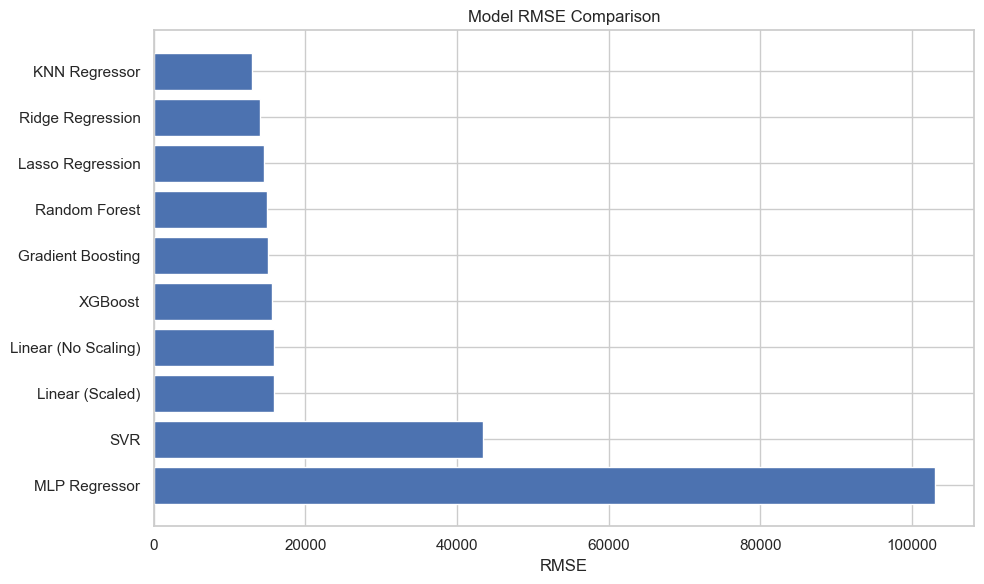

In [43]:
plt.figure(figsize=(10, 6))
plt.barh(summary_df_sorted["Model"], summary_df_sorted["RMSE"])
plt.xlabel("RMSE")
plt.title("Model RMSE Comparison")
plt.gca().invert_yaxis()  # Best model at top
plt.tight_layout()
plt.show()


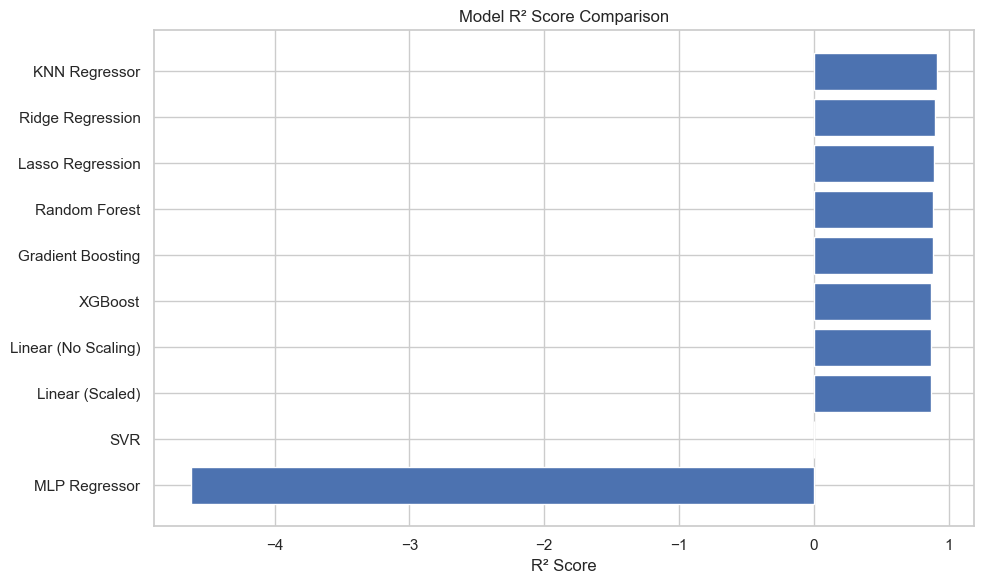

In [44]:
plt.figure(figsize=(10, 6))
plt.barh(summary_df_sorted["Model"], summary_df_sorted["R2 Score"])
plt.xlabel("R² Score")
plt.title("Model R² Score Comparison")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
